In [2]:
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
import pandas as pd
import numpy as np
import json
import ast
from sklearn.model_selection import train_test_split

from utils import Indexer

from tqdm import tqdm

In [17]:
links = 'data/links.csv'
metadata = 'data/movies_metadata.csv'
credit = 'data/credits.csv'
rating = 'data/ratings.csv'

train_dir = 'processed_data/rating_train.csv'
test_dir = 'processed_data/rating_test.csv'

overview = 'processed_data/overviews.csv'



In [22]:
data = pd.read_csv(overview)
data.head()

,mId,overview
0,0,"Led by Woody, Andy's toys live happily in his ..."
1,1,When siblings Judy and Peter discover an encha...
2,2,A family wedding reignites the ancient feud be...
3,3,"Cheated on, mistreated and stepped on, the wom..."
4,4,Just when George Banks has recovered from his ...


In [45]:
overview_sentences = data['overview'].astype(str)
print("Number of sentence: %d"%(len(overview_sentences)) )
type(overview_sentence)
# overview_sentence[1]

Number of sentence: 45463


list

In [41]:
# # Parsing the overview sentences
# overview_sentences = []
# for item in overview_sentence:
#     overview_sentences.append(item)


In [52]:
# Tokenize the sentences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000 # Size of word corpus
embedding_dim = 16 # dimension of output vector
max_length = 32 # Maximum length of token
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<ooV>'
data_size = data.shape[0] # Size of training dataset

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(overview_sentences)
word_index = tokenizer.word_index
# print(word_index)
overview_sequences = tokenizer.texts_to_sequences(overview_sentences)
overview_padded = pad_sequences(overview_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# print("\nWord Index = " , word_index)
print(f"Sequences[:3]: {overview_sentence[:3]}")
print("Padded Sequences:")
print(overview_padded[:, :3])
print(overview_padded.shape)


Sequences[:3]: ["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.", "When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.", "A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seaf

In [48]:
print("Padded Sequences:")
print(overview_padded[:, :5])
print(overview_padded.shape)

Padded Sequences:
[[ 532   16 6011    1 3454]
 [  23 2682 5270    4  664]
 [   3   48  593    1    2]
 ...
 [  23   31    6   11 1529]
 [   7    3  123   82  155]
 [1870   60   37    1    6]]
(45463, 32)


In [57]:
x1 = np.arange(10)
x2 = x1*2
y = x1*2
y

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

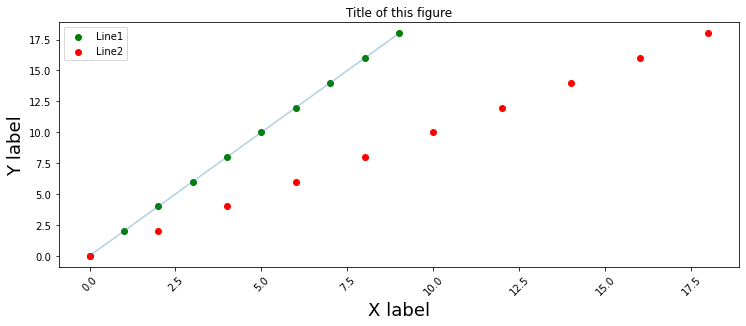

In [64]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.arange(10)
x2 = x1*2
y = x1*2

plt.figure(figsize=(12.2, 4.5)) # width=12.2in, height=4.5in
plt.scatter(x1, y, color='green', label='Line1')
plt.scatter(x2, y, color='red', label='Line2')
plt.plot(x1, y, alpha=0.35) #	Plot y versus x as lines and/or markers.
plt.xticks(rotation=45)
plt.title(label='Title of this figure')
plt.xlabel('X label', fontsize=18)
plt.ylabel('Y label', fontsize=18)
plt.legend(loc='best')
plt.show()


In [71]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = ['2011', '2012', '2013', '2014']
fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
ax.bar(X, data[0], color = 'b', width = 0.25)
ax.bar(X, data[1], color = 'g', width = 0.25)
ax.bar(X, data[2], color = 'r', width = 0.25)

TypeError: can only concatenate list (not "float") to list

<AxesSubplot:title={'center':'DNN Model1: Flatten()-->Dense(128)-->Dense(10)'}, xlabel='dataset', ylabel='Acc(%)'>

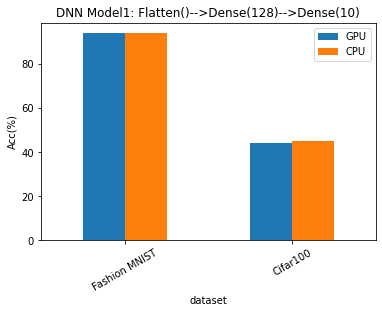

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# df = pd.DataFrame(np.array([[94.13, 94.01], [44.91, 43.97]]),
#     index = ["Fashion MNIST", "Cifar100"],
#     columns=pd.Index(['GPU',' CPU'], name='Device')
# )
df = pd.DataFrame({'GPU': [94.01, 43.97],
        'CPU': [94.01, 44.91]},
        index=["Fashion MNIST", "Cifar100"]
)

df.plot.bar(xlabel='dataset', ylabel='Acc(%)', title='DNN Model1: Flatten()-->Dense(128)-->Dense(10)', rot=30)

# acc = [[94.13, 94.01], [44.91, 43.97]] # CPU acc and GPU acc for Fashion MNIST and Cifar100
# time = [[2.812, 2.871], [1.1, 2.2]]
# X = np.arange(4)
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
# ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)

<AxesSubplot:title={'center':'DNN Model2: Con2D(32)-->Conv2D(64)-->Flatten()-->Dense(128)-->Dense(10)'}, xlabel='dataset', ylabel='Acc(%)'>

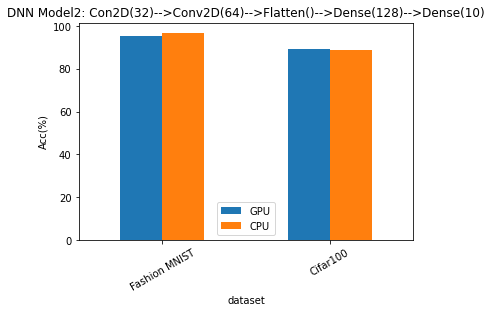

In [89]:
df = pd.DataFrame({'GPU': [95.5, 89.06],
        'CPU': [96.77, 88.61]},
        index=["Fashion MNIST", "Cifar100"]
)

df.plot.bar(xlabel='dataset', ylabel='Acc(%)', title='DNN Model2: Con2D(32)-->Conv2D(64)-->Flatten()-->Dense(128)-->Dense(10)', rot=30)


<AxesSubplot:title={'center':'DNN Model1: Flatten()-->Dense(128)-->Dense(10)'}, xlabel='dataset', ylabel='Time(sec/epoch)'>

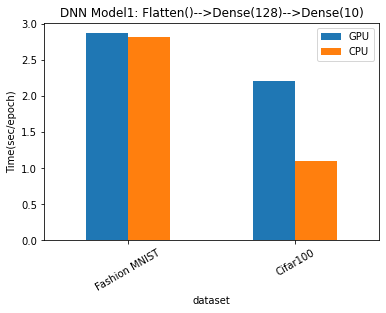

In [92]:
df = pd.DataFrame({'GPU': [2.871, 2.2],
        'CPU': [2.812, 1.1]},
        index=["Fashion MNIST", "Cifar100"]
)

df.plot.bar(xlabel='dataset', ylabel='Time(sec/epoch)', title='DNN Model1: Flatten()-->Dense(128)-->Dense(10)', rot=30)

<AxesSubplot:title={'center':'DNN Model2: Con2D(32)-->Conv2D(64)-->Flatten()-->Dense(128)-->Dense(10)'}, xlabel='dataset', ylabel='Time(sec/epoch)'>

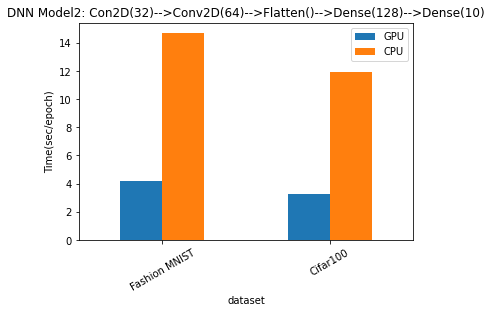

In [93]:
df = pd.DataFrame({'GPU': [4.2, 3.3],
        'CPU': [14.7, 11.9]},
        index=["Fashion MNIST", "Cifar100"]
)

df.plot.bar(xlabel='dataset', ylabel='Time(sec/epoch)', title='DNN Model2: Con2D(32)-->Conv2D(64)-->Flatten()-->Dense(128)-->Dense(10)', rot=30)


<AxesSubplot:title={'center':'What is the Best DNN model for IMDB-Wiki  Dataset(on similar ACC)'}, xlabel='DNN Model', ylabel='Time(sec/epoch)'>

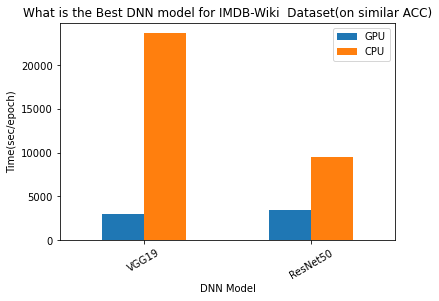

In [95]:
df = pd.DataFrame({'GPU': [3022, 3429],
        'CPU': [23679, 9526]},
        index=["VGG19", "ResNet50"]
)

df.plot.bar(xlabel='DNN Model', ylabel='Time(sec/epoch)', title='What is the Best DNN model for IMDB-Wiki  Dataset(on similar ACC)', rot=30)


array([<AxesSubplot:title={'center':'Time(sec/epoch)'}, xlabel='Cores', ylabel='Time(sec/epoch)'>,
       <AxesSubplot:title={'center':'Throughput(step/sec)'}, xlabel='Cores', ylabel='Time(sec/epoch)'>],
      dtype=object)

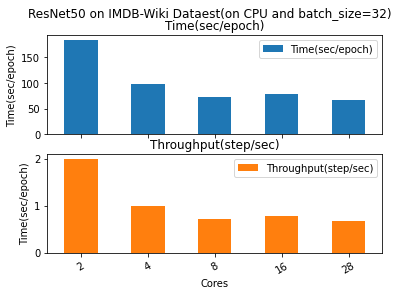

In [113]:
df = pd.DataFrame({'Time(sec/epoch)': [184, 99, 72, 78, 67],
        'Throughput(sec/step)': [2, 0.988, 0.719, 0.779, 0.668]},
        index=[2, 4, 8, 16, 28]
)

df.plot.bar(xlabel='Cores', ylabel='Time(sec)', title='ResNet50 on IMDB-Wiki Dataest(on CPU and batch_size=32)', rot=30, subplots=True)


array([<AxesSubplot:title={'center':'Time(sec/epoch)'}, xlabel='Cores', ylabel='Time(sec/epoch)'>,
       <AxesSubplot:title={'center':'Throughput(step/sec)'}, xlabel='Cores', ylabel='Time(sec/epoch)'>],
      dtype=object)

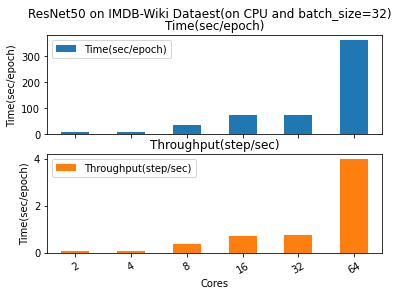

In [112]:
df = pd.DataFrame({'Time(sec/epoch)': [8, 10, 37, 72, 74, 361],
        # 'Throughput(step/ms)': [84, 95, 374, 715, 737, 4000]},
        'Throughput(sec/step)': [0.084, 0.095, 0.374, 0.715, 0.737, 4]},
        index=[2, 4, 8, 16, 32, 64]
)

df.plot.bar(xlabel='Batch size', ylabel='Time(sec)', title='ResNet50 on IMDB-Wiki Dataest(on GPU and cores=28)', rot=30, subplots=True)
